In [2]:
from zipfile import ZipFile
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
with ZipFile('archive.zip', 'r') as zObject:
    zObject.extractall(path="dataset")

df = pd.read_csv("dataset/heart.csv")


In [8]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Внутри-кластерная сумма расстояний')

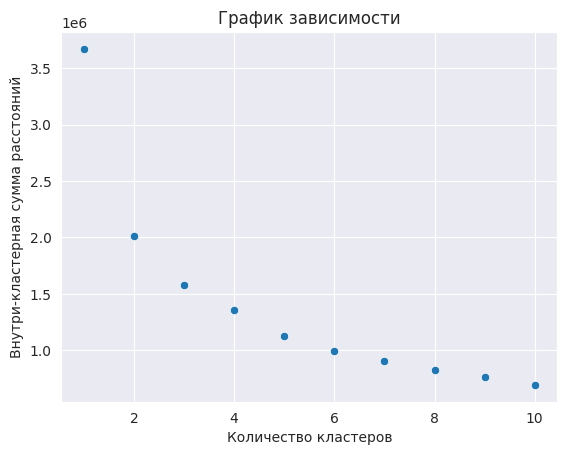

In [9]:
inertia = []
for i in range(1, 11):
  k_means = KMeans(n_clusters=i, init= 'k-means++')
  k_means.fit(
    df
  )
  inertia.append(k_means.inertia_)
sns.set_style('darkgrid')
sns.scatterplot(
  x=[x for x in range(1, 11)],
  y=inertia,
)
plt.title('График зависимости')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')

In [10]:
CLUSTERS = 4
model = KMeans(n_clusters=CLUSTERS)

model.fit(df)

clusters = pd.DataFrame(
  columns=df.columns,
  data=model.cluster_centers_
)
clusters["Amount"] = np.unique(
  model.labels_,
  return_counts=True
)[1]
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Amount
0,54.647059,0.715294,1.014118,129.743529,243.569412,0.136471,5.082353e-01,152.477647,0.294118,0.920000,1.385882,0.748235,2.350588,0.564706,425
1,51.943750,0.740625,0.971875,128.418750,193.196875,0.143750,6.406250e-01,148.406250,0.312500,1.111250,1.406250,0.603125,2.212500,0.565625,320
2,62.625000,0.000000,0.750000,136.687500,436.250000,0.187500,1.110223e-16,155.500000,0.187500,2.031250,1.187500,1.312500,2.625000,0.562500,16
3,56.613636,0.651515,0.803030,138.181818,302.386364,0.174242,4.621212e-01,144.170455,0.443182,1.209091,1.371212,0.912879,2.397727,0.363636,264
